<a href="https://colab.research.google.com/github/edupiorini/alura-data-science/blob/master/Aula0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando notas em geral

In [1]:
import pandas as pd
notas = pd.read_csv ('/home/eduardopiorini/Documentos/Alura/data-science/alura-data-science/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape
#mostra o formato dos dados como (index, colunas)

(100836, 4)

In [3]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
#altera os labels das colunas para os definidos
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Para mais informações buscar por Pandas Dataframe e Panda Series


In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Mas quantas vezes a nota 4.0 aparece? (contador de valores)

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
notas['nota'].mean()
#obtendo a média dos valores

3.501556983616962

# Aula 01

In [7]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

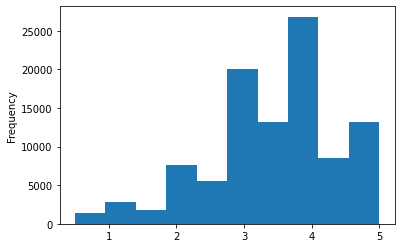

In [8]:
notas.nota.plot(kind ='hist')

In [9]:
print(notas.nota.mean())
print(notas.nota.median())


3.501556983616962
3.5


In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

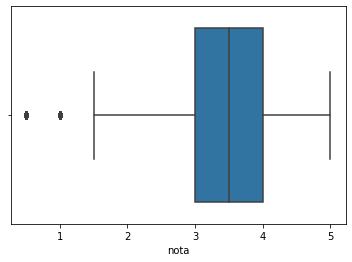

In [10]:
#vamos utilizar o seaborn para melhorar os gráficos
import seaborn as sns

sns.boxplot(notas.nota)


# Exercício aula 1

Letícia é uma estudante de Data Science pela Alura. Um dia, para consolidar o seu conhecimento sobre o que foi estudado, ela decidiu fazer a análise de um arquivo CSV que contém dados sobre filmes lançados recentemente. Um desses dados era uma avaliação dos filmes feita pelos usuários, com notas de zero a dez. Letícia gostaria de analisar quantas vezes cada uma das notas apareceu no CSV, considerando o total de avaliações feitas pelo usuário.

Como ela pode fazer essa contabilidade?


* A maneira mais fácil de realizar essa contagem é utilizar este método(value_counts()) do pandas. Com ele, conseguimos contar a ocorrência dos valores de um maneira mais simples.*

#Exercício 2  Faça o que eu fiz na aula
vide descrição na aula

print(notas.nota.unique())
notas.nota.value_counts()

print(notas.nota.mean())

notas.nota.median()



# Olhando filmes

In [14]:
filmes = pd.read_csv("/home/eduardopiorini/Documentos/Alura/data-science/alura-data-science/movies.csv")
filmes.columns = ['filmeId', ' titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
notas.query("filmeId == 1").nota #query -> pergunta para os dados

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

# Analisando notas especificas por filme

In [17]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [26]:
#Agrupando dados da coluna filmeId
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

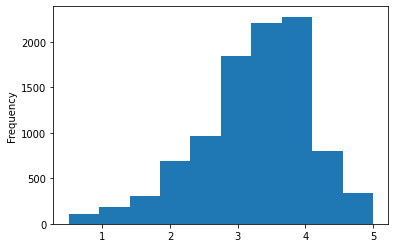

In [27]:
medias_por_filme.plot(kind = 'hist')

<AxesSubplot:ylabel='nota'>

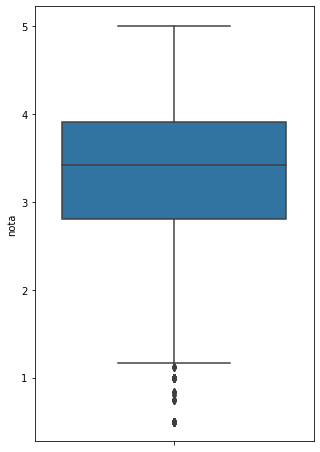

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) #forçando o gráfico para ficar em um determinado tamanho
sns.boxplot(y=medias_por_filme)


In [40]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

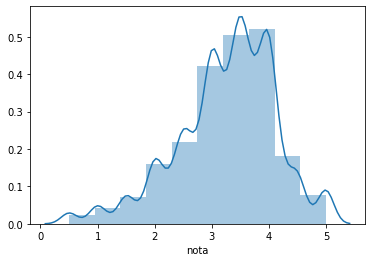

In [34]:
sns.distplot(medias_por_filme, bins=10) # bins seleciona a precisão(divisão) do gráfico

<AxesSubplot:xlabel='nota'>

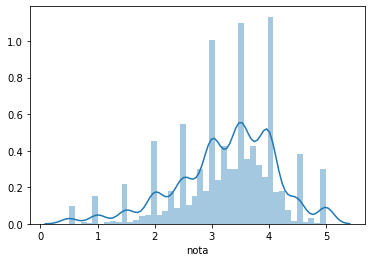

In [33]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

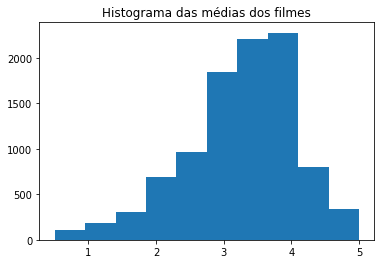

In [38]:
#Essa biblioteca está por tras dos plots do pandas e do seaborn
#pode ser considerada como a biblioteca de nivel mais baixo
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Como podemos obter a média de cada um dos filmeID (filmes) sem ter que digitar o comando milhares de vezes?

In [50]:
medias_por_filme = notas.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64